In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
SAMPLE = 2000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
x_val=np.random.uniform(low=0, high=4*math.pi, size=SAMPLE)

In [4]:
np.random.shuffle(x_val)

In [5]:
y_val = np.cos(x_val)

<function matplotlib.pyplot.show(close=None, block=None)>

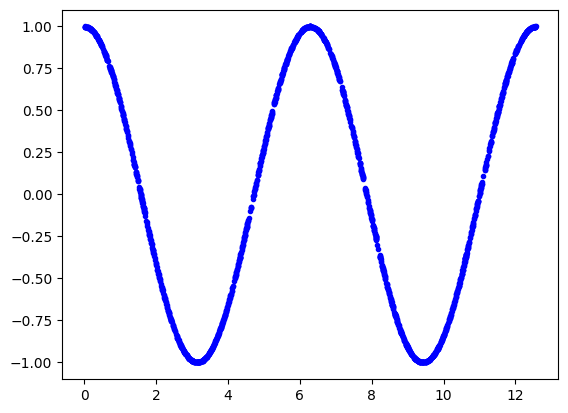

In [6]:
plt.plot(x_val,y_val,'b.')
plt.show

In [7]:
y_val += 0.1 *np.random.randn(*y_val.shape)

<function matplotlib.pyplot.show(close=None, block=None)>

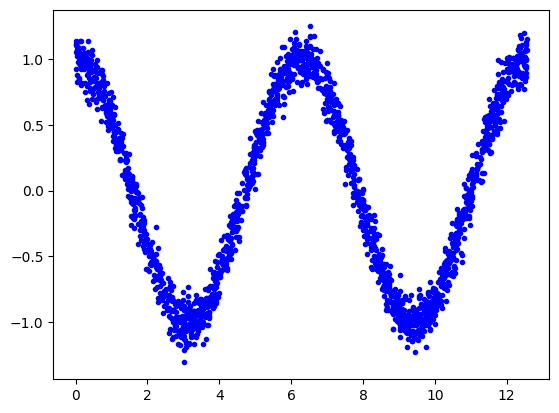

In [8]:
plt.plot(x_val,y_val,'b.')
plt.show

In [9]:
TRAIN_SPLIT = int(0.6 * SAMPLE)
TEST_SPLIT = int(0.2 * SAMPLE + TRAIN_SPLIT)

In [10]:
x_train, x_validate, x_test = np.split(x_val, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_val, [TRAIN_SPLIT, TEST_SPLIT])

In [11]:
assert (x_train.size + x_validate.size + x_test.size) == SAMPLE

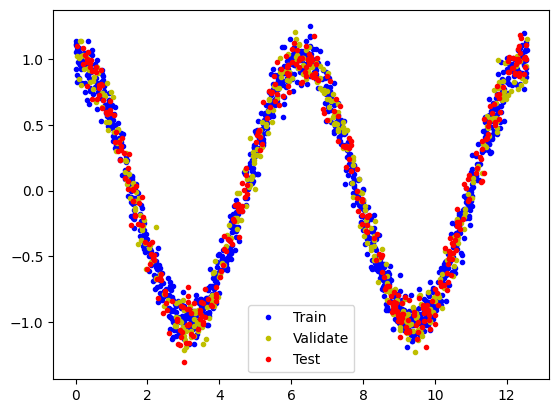

In [12]:
plt.plot(x_train, y_train, 'b.', label = "Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test,y_test,'r.', label ="Test")
plt.legend()
plt.show()         

In [13]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])
model_1.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_1 = model_1.fit(x_train, y_train, epochs=1000,batch_size=16,validation_data=(x_validate,y_validate))

Epoch 1/1000
75/75 [==============================] - 1s 3ms/step - loss: 0.5144 - mae: 0.6421 - val_loss: 0.5206 - val_mae: 0.6477
Epoch 2/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5119 - mae: 0.6385 - val_loss: 0.5216 - val_mae: 0.6484
Epoch 3/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5105 - mae: 0.6394 - val_loss: 0.5203 - val_mae: 0.6476
Epoch 4/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5109 - mae: 0.6389 - val_loss: 0.5201 - val_mae: 0.6472
Epoch 5/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5083 - mae: 0.6369 - val_loss: 0.5185 - val_mae: 0.6469
Epoch 6/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5084 - mae: 0.6375 - val_loss: 0.5206 - val_mae: 0.6475
Epoch 7/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5061 - mae: 0.6360 - val_loss: 0.5150 - val_mae: 0.6440
Epoch 8/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.

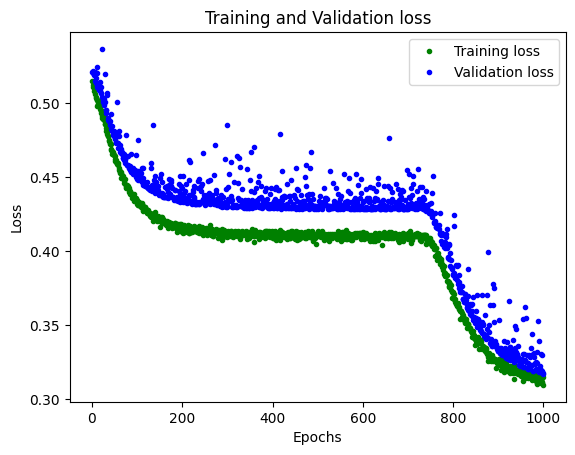

In [15]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss, 'g.', label ='Training loss')
plt.plot(epochs,val_loss, 'b.', label ="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

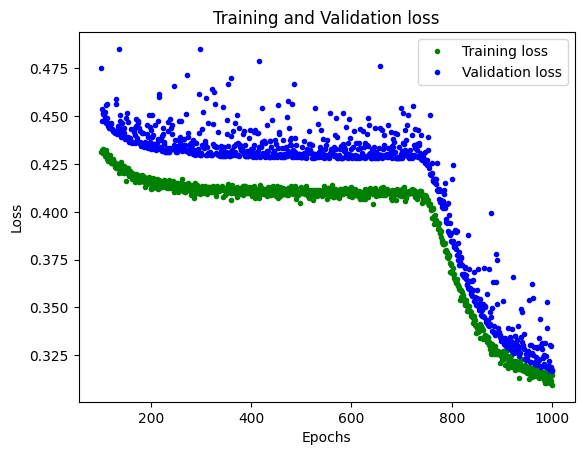

In [16]:
SKIP = 100
plt.plot(epochs[SKIP:],loss[SKIP:],'g.', label ='Training loss')
plt.plot(epochs[SKIP:],val_loss[SKIP:],'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

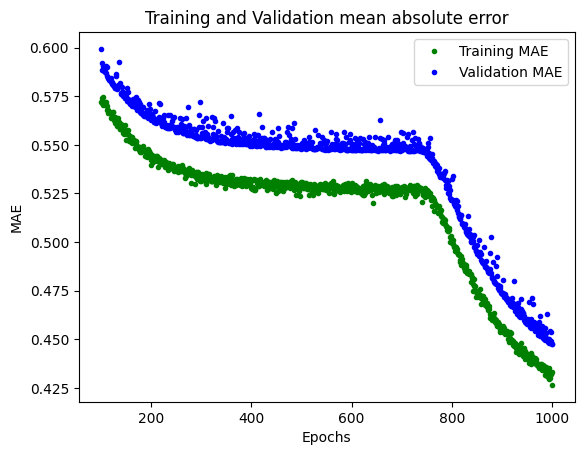

In [17]:
mae = history_1.history['mae']
val_mae =history_1.history['val_mae']

plt.plot(epochs[SKIP:],mae[SKIP:],'g.', label ='Training MAE')
plt.plot(epochs[SKIP:],val_mae[SKIP:],'b.', label='Validation MAE')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

13/13 [==============================] - 0s 731us/step


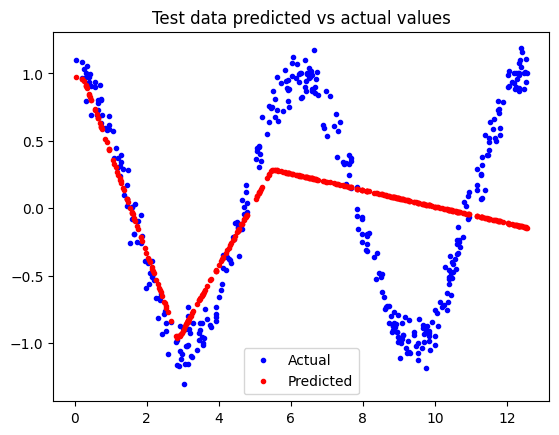

In [18]:
loss = model_1.evaluate(x_test,y_test)
predictions =model_1.predict(x_test)
plt.clf()
plt.title('Test data predicted vs actual values')
plt.plot(x_test ,y_test,'b.', label ="Actual")
plt.plot(x_test, predictions,'r.',label ='Predicted')
plt.legend()
plt.show()

In [19]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(1,)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])
model_2.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_2 = model_2.fit(x_train, y_train, epochs=1000,batch_size=16,validation_data=(x_validate,y_validate))

Epoch 1/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.5502 - mae: 0.6512 - val_loss: 0.5202 - val_mae: 0.6466
Epoch 2/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5106 - mae: 0.6389 - val_loss: 0.5217 - val_mae: 0.6475
Epoch 3/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5092 - mae: 0.6389 - val_loss: 0.5205 - val_mae: 0.6472
Epoch 4/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5098 - mae: 0.6388 - val_loss: 0.5199 - val_mae: 0.6469
Epoch 5/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5089 - mae: 0.6382 - val_loss: 0.5199 - val_mae: 0.6469
Epoch 6/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5098 - mae: 0.6393 - val_loss: 0.5227 - val_mae: 0.6485
Epoch 7/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.5099 - mae: 0.6393 - val_loss: 0.5202 - val_mae: 0.6473
Epoch 8/1000
75/75 [==============================] - 0s 1ms/step - loss: 0.

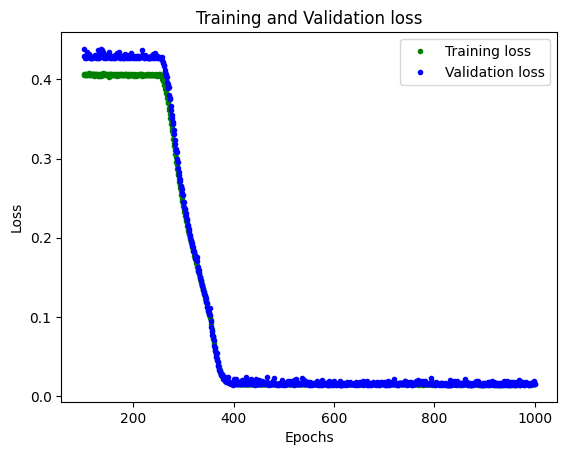

In [21]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1,len(loss)+1)

SKIP = 100
plt.plot(epochs[SKIP:],loss[SKIP:],'g.', label ='Training loss')
plt.plot(epochs[SKIP:],val_loss[SKIP:],'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

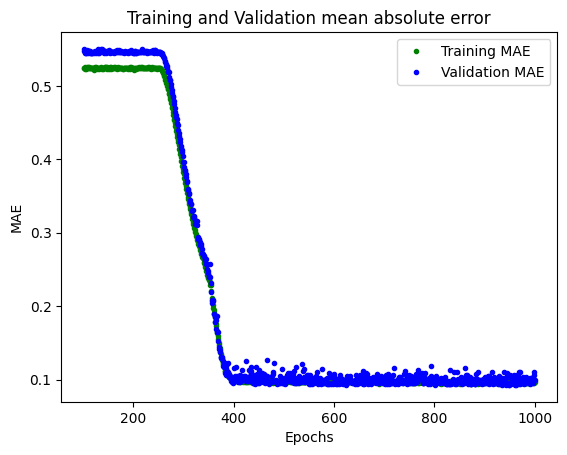

In [22]:
mae = history_2.history['mae']
val_mae =history_2.history['val_mae']

plt.plot(epochs[SKIP:],mae[SKIP:],'g.', label ='Training MAE')
plt.plot(epochs[SKIP:],val_mae[SKIP:],'b.', label='Validation MAE')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

13/13 [==============================] - 0s 833us/step


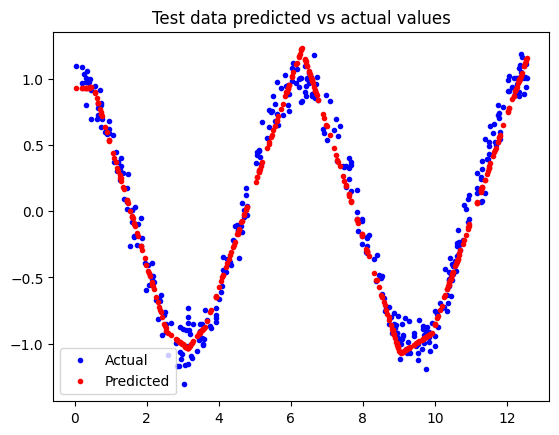

In [23]:
loss = model_2.evaluate(x_test,y_test)
predictions =model_2.predict(x_test)
plt.clf()
plt.title('Test data predicted vs actual values')
plt.plot(x_test ,y_test,'b.', label ="Actual")
plt.plot(x_test, predictions,'r.',label ='Predicted')
plt.legend()
plt.show()

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

open("cos_model.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\chock\AppData\Local\Temp\tmpjfs7l64b\assets


3192

In [25]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [26]:
def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value,dtype =np.float32,ndmin=2)]
        
converter.representative_dataset = representative_dataset_generator

tflite_model_2 = converter.convert()
open("cos_model_quantized.tflite","wb").write(tflite_model_2)

INFO:tensorflow:Assets written to: C:\Users\chock\AppData\Local\Temp\tmp3xemumy9\assets


INFO:tensorflow:Assets written to: C:\Users\chock\AppData\Local\Temp\tmp3xemumy9\assets
C:\Users\chock\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


3040

In [27]:
cos_model = tf.lite.Interpreter('cos_model.tflite')
cos_model_quantized = tf.lite.Interpreter('cos_model_quantized.tflite')

cos_model.allocate_tensors()
cos_model_quantized.allocate_tensors()

cos_model_input_index = cos_model.get_input_details()[0]["index"]
cos_model_output_index = cos_model.get_output_details()[0]["index"]
cos_model_quantized_input_index = cos_model_quantized.get_input_details()[0]["index"]
cos_model_quantized_output_index = cos_model_quantized.get_output_details()[0]["index"]

cos_model_predictions = []
cos_model_quantized_predictions =[]


In [28]:
for x_value in x_test:
    x_value_tensor = tf.convert_to_tensor([[x_value]],dtype=np.float32)
    
    cos_model.set_tensor(cos_model_input_index,x_value_tensor)
    
    cos_model.invoke()
    
    cos_model_predictions.append(cos_model.get_tensor(cos_model_output_index)[0])
    
    cos_model_quantized.set_tensor(cos_model_quantized_input_index,x_value_tensor)
    
    cos_model_quantized.invoke()
    
    
    cos_model_quantized_predictions.append(cos_model_quantized.get_tensor(cos_model_quantized_output_index)[0])
                                            
                                  
                                

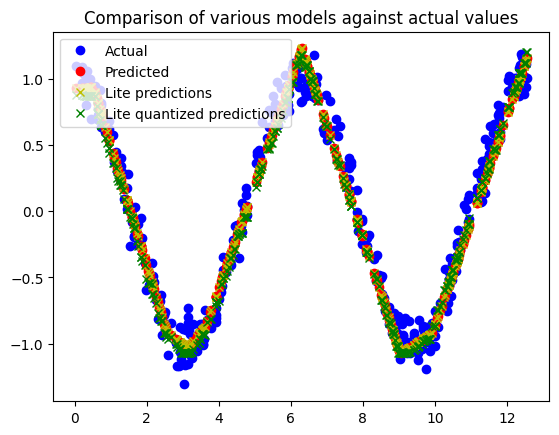

In [29]:
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test ,y_test,'bo', label ="Actual")
plt.plot(x_test, predictions,'ro',label ='Predicted')
plt.plot(x_test, cos_model_predictions,'yx',label ='Lite predictions')
plt.plot(x_test, cos_model_quantized_predictions,'gx',label ='Lite quantized predictions')
plt.legend()
plt.show()

In [30]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'

    # Add array length at top of file
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data) :

        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [31]:
model_tflite_file = open('cos_model_quantized.tflite','rb')
model_tflite = model_tflite_file.read()

In [32]:
with open('cosine_model.h','w') as file:
    file.write(hex_to_c_array(model_tflite,'cosine_model'))